# This is the code part for the movie recommendations system





To compute the similarity between we are going to use the cosine approach to determine the distance between users / items

<img src="cosine.png">

This means that we are not going to compare them based on the distance between their vector values, but taking into account the direction in which they are pointing



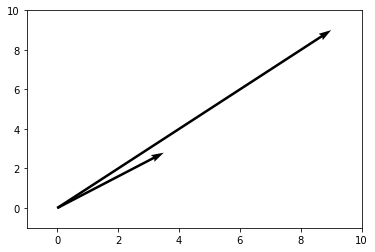

In [79]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

soa = np.array([[0, 0, 3.5, 2.8], [0, 0, 9, 9]])
X, Y, U, V = zip(*soa)
plt.figure()
ax = plt.gca()
ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1)
ax.set_xlim([-1, 10])
ax.set_ylim([-1, 10])
plt.draw()
plt.show()


In [40]:
from surprise import Dataset, evaluate
from surprise import KNNBasic, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy
from collections import defaultdict
import os

### Now we have imported our tools, we are going to import the data

In [32]:
data = Dataset.load_builtin("ml-100k")
trainingSet = data.build_full_trainset()

#### Decalare our training model

In [33]:
model = KNNBasic(name='cosine', user_based=False)


In [34]:
model.fit(trainset=trainingSet)

Computing the msd similarity matrix...
Done computing similarity matrix.


In [35]:
testSet = trainingSet.build_anti_testset()
predictions = model.test(testSet)

In [36]:
def set_top_recommendations(predictions, top_n = 3):
    
    # Define a default list for every user's predictions
    recommendations = defaultdict(list)
    
    # For every prediction, we are going to create a dictionary to store them by user
    for user_id, movie_id, _, est, _ in predictions:
        recommendations[user_id].append((movie_id, est))
    
    # When we have them grouped by user, we are going to sort them by their estimation
    # meaning that the ones with higher estimation are the ones more likely that the user will like
    for user_id, user_ratings in recommendations.items():
        # For every user, we sort from highest to lowest according to estimation
        user_ratings.sort(key = lambda x: x[1], reverse = True)
        # Then we only store the ones for which the limit was given
        recommendations[user_id] = user_ratings[:top_n]
     
    return recommendations


In [37]:
def display_movie_names():
    
    # What this method is aiming to do is to transform the ids of the movies
    # into their names so it is more user friendly

    file_name = (os.path.expanduser('~') + '/.surprise_data/ml-100k/ml-100k/u.item')
    id_name = {}
    with open(file_name, 'r', encoding='ISO-8859-1') as f:
        for line in f:
            line = line.split('|')
            id_name[line[0]] = line[1]
 
    return id_name


In [38]:
top_recommendations = set_top_recommendations(predictions,4)
id_names = display_movie_names()
user_id = str(263)
print(user_id, [id_names[movie_id] for (movie_id, _) in top_recommendations[user_id]])

263 ['Prefontaine (1997)', 'Santa with Muscles (1996)', 'Great Day in Harlem, A (1994)', 'Aiqing wansui (1994)']


In [39]:
print(accuracy.rmse(predictions))

RMSE: 0.9181
0.918127345205456


# Now we are going to use the SVD algorithm to compare their accuracy

In [43]:
trainset, testset = train_test_split(data, test_size=.25)
algo = SVD()

In [44]:
algo.fit(trainset)
predictions = algo.test(testset)

In [46]:
accuracy.rmse(predictions)

RMSE: 0.9425


0.9424738577109092

In [47]:
top_recommendations = set_top_recommendations(predictions,4)
id_names = display_movie_names()
user_id = str(263)
print(user_id, [id_names[movie_id] for (movie_id, _) in top_recommendations[user_id]])


263 ['Shawshank Redemption, The (1994)', 'Bridge on the River Kwai, The (1957)', 'Star Wars (1977)', 'Great Escape, The (1963)']
